In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housepricedatacsv/housepricedata.csv


In [30]:
df = pd.read_csv('../input/housepricedatacsv/housepricedata.csv')

In [31]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [32]:
dataset = df.values

In [33]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [34]:
X = dataset[:,0:10]

In [35]:
Y = dataset[:,10]

In [36]:
from sklearn import preprocessing

In [37]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [38]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [41]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [42]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [43]:
from keras.models import Sequential
from keras.layers import Dense

In [44]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [45]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.6871 - accuracy: 0.5547 - val_loss: 0.6838 - val_accuracy: 0.6621
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.6603 - val_loss: 0.6767 - val_accuracy: 0.7215
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.7082 - val_loss: 0.6695 - val_accuracy: 0.7854
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6709 - accuracy: 0.7400 - val_loss: 0.6634 - val_accuracy: 0.7991
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6653 - accuracy: 0.7769 - val_loss: 0.6580 - val_accuracy: 0.7991
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6603 - accuracy: 0.7862 - val_loss: 0.6527 - val_accuracy: 0.7945
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6527 - accuracy: 0.7986 - val_loss: 0.6474 - val_accuracy: 0.8037
Epoch 8/100


In [47]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.8721


0.8721461296081543

In [48]:
import matplotlib.pyplot as plt

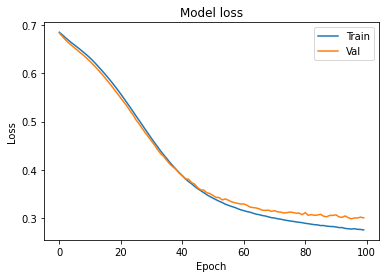

In [49]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

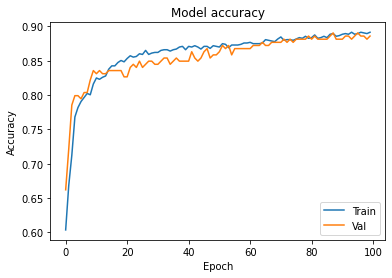

In [57]:

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [58]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [59]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [60]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 58ms/step - loss: 0.5295 - accuracy: 0.7315 - val_loss: 0.3760 - val_accuracy: 0.8767
Epoch 2/100
32/32 [==============================] - 2s 47ms/step - loss: 0.3578 - accuracy: 0.8468 - val_loss: 0.3636 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 2s 48ms/step - loss: 0.2995 - accuracy: 0.8784 - val_loss: 0.3194 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2851 - accuracy: 0.8731 - val_loss: 0.3069 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2459 - accuracy: 0.8925 - val_loss: 0.3358 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2416 - accuracy: 0.9001 - val_loss: 0.3257 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2397 - accuracy: 0.8844 - val_loss: 0.3090 - val_accuracy: 0.8995
Epoch 

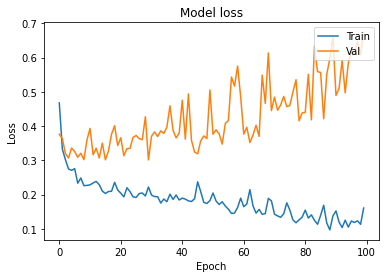

In [61]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

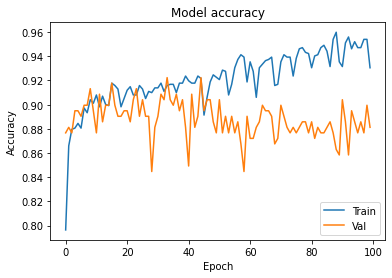

In [63]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [64]:
from keras.layers import Dropout
from keras import regularizers

In [65]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [66]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 45ms/step - loss: 21.1161 - accuracy: 0.5966 - val_loss: 3.8829 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 1s 37ms/step - loss: 2.4782 - accuracy: 0.8469 - val_loss: 0.6418 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 1s 45ms/step - loss: 0.5839 - accuracy: 0.8720 - val_loss: 0.5268 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 1s 40ms/step - loss: 0.5151 - accuracy: 0.8617 - val_loss: 0.4889 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.4998 - accuracy: 0.8663 - val_loss: 0.4744 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 37ms/step - loss: 0.4882 - accuracy: 0.8586 - val_loss: 0.4847 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 1s 37ms/step - loss: 0.4691 - accuracy: 0.8717 - val_loss: 0.4574 - val_accuracy: 0.8813
Epoch

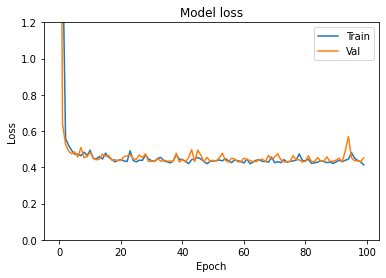

In [68]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

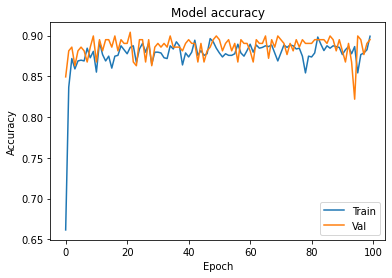

In [70]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()